In [1]:
import utils
import config
from finetune import finetune_model
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

/home/oh/owl982/.conda/envs/tda_for_fairness/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


c:\Users\aleks\Documents\dev\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\aleks\Documents\dev\.venv\Lib\site-packages\trak\traker.py:69: SyntaxWarning: invalid escape sequence '\e'
  """
c:\Users\aleks\Documents\dev\.venv\Lib\site-packages\trak\score_computers.py:72: SyntaxWarning: invalid escape sequence '\P'
  """Computes the scores for a given set of features and target gradients.


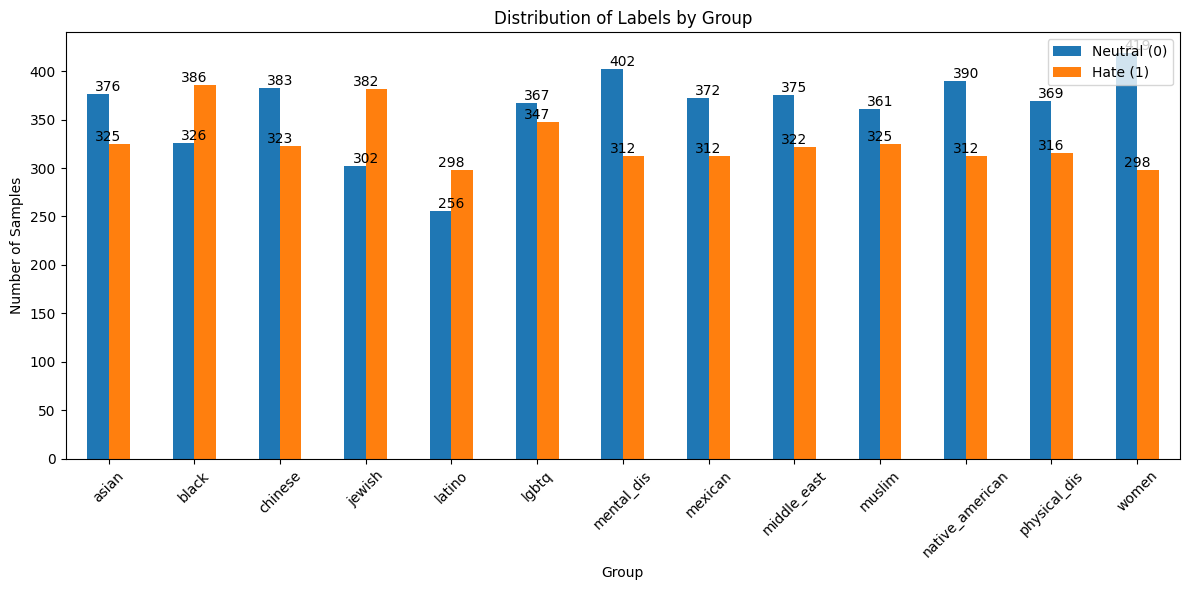

In [1]:
import pandas as pd
import datasets_prep as dp
import config
import torch
import utils

PATH_TO_DATA = "../../data/toxigen/"
dp.prepare_toxigen(PATH_TO_DATA,config.TEST_SAMPLES_PER_GROUP)

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_df = pd.read_csv(PATH_TO_DATA + "train.csv")

utils.plot_distr_by_group(train_df, "train")

In [ ]:
import matplotlib.pyplot as plt

df = train_df

grouped_data = df.groupby(['target_group', 'label']).size().unstack()

# Set up the plot
plt.figure(figsize=(12, 6))

# Create the grouped bar plot
grouped_data.plot(kind='bar', ax=plt.gca())

# Customize the plot
plt.title('Distribution of Labels by Group')
plt.xlabel('Group')
plt.ylabel('Number of Samples')
plt.legend(['Neutral (0)', 'Hate (1)'])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add value labels on top of each bar
for i in range(len(grouped_data)):
    for j in range(len(grouped_data.columns)):
        value = grouped_data.iloc[i, j]
        plt.text(i, value, str(value), ha='center', va='bottom')

# Adjust layout to prevent cutoff
plt.tight_layout()
plt.show()
#plt.savefig(f'../vis/distr_by_group_{title}.png', dpi=300, bbox_inches='tight')

In [16]:
import datasets_prep as dp
train_dataset = dp.get_toxigen_dataset("train")
train_dl = dp.get_dataloader(train_dataset, config.BATCH_SIZE)

Map: 100%|██████████| 260/260 [00:00<00:00, 7441.28 examples/s]


In [ ]:
PATH_TO_DATA = "../../data/toxigen/"
annotated_train, annotated_test = utils.prepare_datasets()
tokenizer = AutoTokenizer.from_pretrained(config.TOKENIZER_NAME)

model_path = "../../output/base_model_finetuning/checkpoint-5600/"
model_checkpoint = AutoModelForSequenceClassification.from_pretrained(model_path,num_labels = 2).to("cuda")
train_dataset = utils.TextClassificationDataset(annotated_train["text"].tolist(), annotated_train["label"], tokenizer, config.MAX_LENGTH)
val_dataset = utils.TextClassificationDataset(annotated_test["text"].tolist(), annotated_test["label"], tokenizer, config.MAX_LENGTH)
train_dataloader = utils.get_dataloader(annotated_train, tokenizer, config.MAX_LENGTH, config.BATCH_SIZE)
val_dataloader = utils.get_dataloader(annotated_test, tokenizer, config.MAX_LENGTH, config.BATCH_SIZE)

: 

In [4]:
first_module_tda = utils.FirstModuleTDA(train_dataloader, val_dataloader, model_checkpoint,tokenizer)
first_module_tda.get_TRAK_scores(out = "../../output/TRAK_scores/")

ERROR:TRAK:Could not use CudaProjector.
Reason: No module named 'fast_jl'
ERROR:TRAK:Defaulting to BasicProjector.
/home/oh/owl982/.conda/envs/tda_for_fairness/lib/python3.12/site-packages/trak/traker.py:69: SyntaxWarning: invalid escape sequence '\e'
  """


OutOfMemoryError: CUDA out of memory. Tried to allocate 20.39 GiB. GPU 